In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [182]:
RANGE=120
HOSPITAL_OFFSET=7
ICU_OFFSET=14
FONT_SIZE=12
DEATH_DELAY=3

In [183]:
df_cases=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20211206.csv', index_col='Date',parse_dates=True)
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211206.csv', index_col='Date',parse_dates=True)

df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

(18850.0, 18968.0)

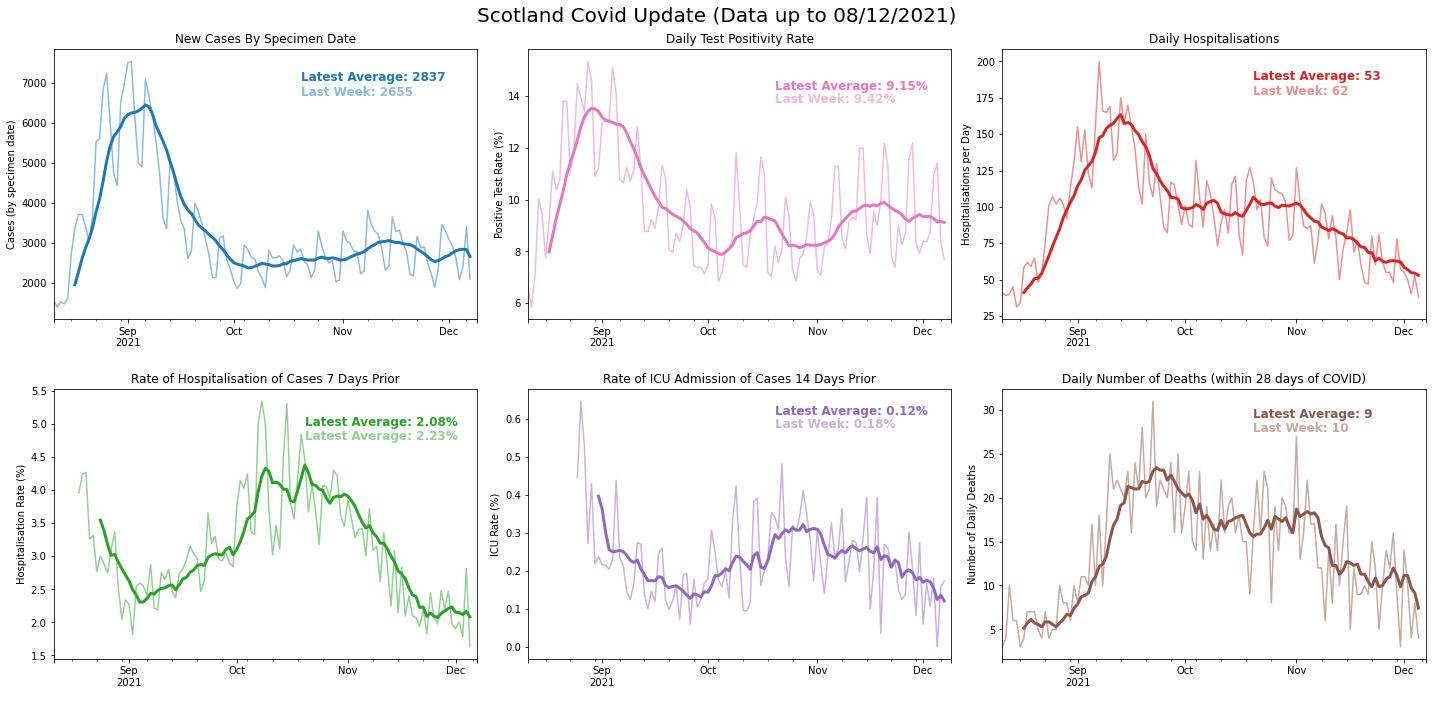

In [184]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Scotland Covid Update (Data up to '+df_cases.index[-1].strftime("%d/%m/%Y")+")", fontsize=20)

#
# Cases
#

plt.subplot(2,3,1)

df_cases['DailyCases'].iloc[-RANGE:-1].plot(alpha=0.5)
df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C0')

plt.ylabel('Cases (by specimen date)')
plt.xlabel(' ')
plt.title('New Cases By Specimen Date')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_cases['DailyCases'].index[-50],y=0.9*y_max,c='C0', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_cases['DailyCases'].index[-50],y=0.85*y_max,c='C0', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Pos Rate
#

plt.subplot(2,3,2)
df_hospital['PositivePercentage'].iloc[-RANGE:-1].plot(alpha=0.5,c='C6')
df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C6')

plt.ylabel('Positive Test Rate (%)')
plt.xlabel(' ')
plt.title('Daily Test Positivity Rate')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean()[-3],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.9*y_max,c='C6', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-8].rolling(window=7).mean()[-1],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.87*y_max,c='C6', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Hospital Admissions
#

plt.subplot(2,3,3)
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].plot(alpha=0.5,c='C3')
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C3')

plt.ylabel('Hospitalisations per Day')
plt.xlabel(' ')
plt.title('Daily Hospitalisations')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C3', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.85*y_max,c='C3', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# Hospitalisation Rate
#

plt.subplot(2,3,4)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).plot(c='C2',alpha=0.5)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean().plot(c='C2',lw=3)
plt.ylabel('Hospitalisation Rate (%)')
plt.xlabel(' ')
plt.title('Rate of Hospitalisation of Cases 7 Days Prior')

latest=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-3]
last_week=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-1]

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C2', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Latest Average: '+str(np.round(last_week,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.86*y_max,c='C2', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# ICU Rate
#

plt.subplot(2,3,5)
df_hospital['ICUAdmissions']
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).plot(c='C4',alpha=0.5)
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean().plot(c='C4',lw=3)

plt.ylabel('ICU Rate (%)')
plt.xlabel(' ')
plt.title('Rate of ICU Admission of Cases 14 Days Prior')
plt.tight_layout()

latest=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
last_week=((df_hospital['ICUAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.9*y_max,c='C4', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(last_week,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.85*y_max,c='C4', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Deaths
#

plt.subplot(2,3,6)
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].plot(alpha=0.5,c='C5')
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean().plot(lw=3,c='C5')

plt.ylabel('Number of Daily Deaths')
plt.xlabel(' ')
plt.title('Daily Number of Deaths (within 28 days of COVID)')
plt.tight_layout()
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.9*y_max,c='C5', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY-7].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.85*y_max,c='C5', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

In [185]:
df_hospital.columns.tolist()

['HB',
 'HBName',
 'DailyPositive',
 'CumulativePositive',
 'CrudeRatePositive',
 'CrudeRate7DayPositive',
 'DailyDeaths',
 'CumulativeDeaths',
 'CrudeRateDeaths',
 'DailyNegative',
 'CumulativeNegative',
 'CrudeRateNegative',
 'TotalTests',
 'PositiveTests',
 'PositivePercentage',
 'PositivePercentage7Day',
 'TotalPillar1',
 'TotalPillar2',
 'HospitalAdmissions',
 'HospitalAdmissionsQF',
 'ICUAdmissions',
 'ICUAdmissionsQF',
 'PositivePillar1',
 'PositivePillar2']

In [80]:
latest=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-3]
latest

2.172064823708625

In [79]:
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET)

Date
2021-08-10         NaN
2021-08-11         NaN
2021-08-12         NaN
2021-08-13         NaN
2021-08-14         NaN
                ...   
2021-12-02    0.020482
2021-12-03    0.017881
2021-12-04    0.028162
2021-12-05         NaN
2021-12-06         NaN
Length: 119, dtype: float64

In [78]:
df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET)

Date
2021-08-10       NaN
2021-08-11       NaN
2021-08-12       NaN
2021-08-13       NaN
2021-08-14       NaN
               ...  
2021-12-02    2490.0
2021-12-03    2237.0
2021-12-04    1882.0
2021-12-05    2332.0
2021-12-06    3457.0
Name: DailyCases, Length: 119, dtype: float64

In [55]:
latest

0.13549282466365173

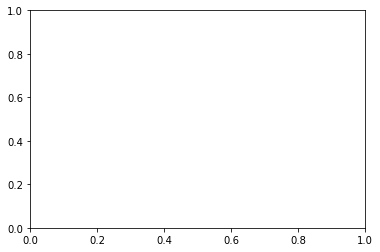

In [65]:
xmin, xmax, ymin, ymax = plt.axis()

In [67]:
xmax

1.0

<AxesSubplot:xlabel='Date'>

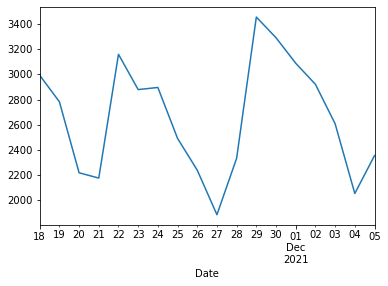

In [130]:
df_cases['DailyCases'].tail(20)[:-2].plot()